In [171]:
#importing libraries 
import numpy as np
import math
import sys
import sympy as sym
from sympy import symbols, exp
import matplotlib.pyplot as plt 

%matplotlib inline

#setting precision upto 10 digits
np.set_printoptions(precision=10)
np.set_printoptions(suppress=True)

# Part A

In [172]:
#defining functions
w = symbols('w')               #w           
a = symbols('a')               #a
u = (-1*sym.exp(-a*w))         #u = utility function
u_ = sym.diff(u,w)             #u'
u__ = sym.diff(u_,w)           #u''
A   = -1*u__/u_                #A = absolute risk aversion
A_  = sym.diff(A,w)            #A'
R   = -1*w*u__/u_              #R = relative risk aversion
R_  = sym.diff(R,w)            #R'

In [173]:
#input value of a 
aval  = 5

In [174]:
#let w varies from 1 to 11, so matrix for w will be
Wm = np.arange(0,10,0.01,dtype=float)
#we will calculate u ,u' u'' etc at each w, thus size of matrix will be 10001 for them
Um   = np.zeros(1000,dtype=float)              #u                  
Um_  = np.zeros(1000,dtype=float)              #u'
Um__ = np.zeros(1000,dtype=float)              #u''
Am   = np.zeros(1000,dtype=float)              #A 
Am_  = np.zeros(1000,dtype=float)              #A'
Rm   = np.zeros(1000,dtype=float)              #R 
Rm_  = np.zeros(1000,dtype=float)              #R'
Wm

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [175]:
#calulating disreate values at each w
for i in range(1000):
    Um[i]   = u.subs({w:Wm[i],a:aval})
    Um_[i]  = u_.subs({w:Wm[i],a:aval})
    Um__[i] = u__.subs({w:Wm[i],a:aval})
    Am[i]   =  A.subs({w:Wm[i],a:aval})
    Am_[i]  =  A_.subs({w:Wm[i],a:aval})
    Rm[i]   =  R.subs({w:Wm[i],a:aval})
    Rm_[i]  =  R_.subs({w:Wm[i],a:aval})
    
Rm

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

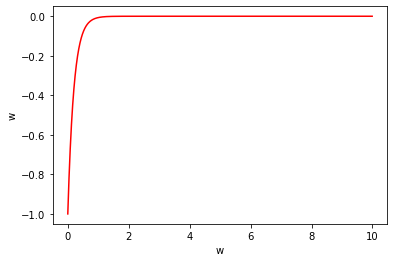

In [176]:
#plotting with matplotlib 
plt.plot(Wm,Um,color='r', label='u')


plt.xlabel("w")
plt.ylabel("w")
#plt.title("u,u',u'',a,a',r,r' on same graph")
#plt.legend()
plt.show()

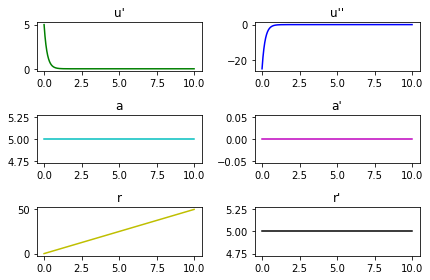

In [177]:
figure, axis = plt.subplots(3, 2)
axis[0, 0].plot(Wm,Um_,color='g')
axis[0, 0].set_title("u\'")
  

axis[0, 1].plot(Wm,Um__,color='b')
axis[0, 1].set_title("u\'\'")
  
# For Tangent Function
axis[1, 0].plot(Wm,Am,color='c')
axis[1, 0].set_title("a")

axis[1, 1].plot(Wm,Am_,color='m')
axis[1, 1].set_title("a\'")

axis[2, 0].plot(Wm,Rm,color='y')
axis[2, 0].set_title("r")

axis[2, 1].plot(Wm,Rm_,color='k')
axis[2, 1].set_title("r\'")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

# Part B

In [199]:
#defining functions
w = symbols('w')               #w           
u = (sym.log(w))               #u = utility function
u_ = sym.diff(u,w)             #u'
u__ = sym.diff(u_,w)           #u''
A   = -1*u__/u_                #A = absolute risk aversion
A_  = sym.diff(A,w)            #A'
R   = -1*w*u__/u_              #R = relative risk aversion
R_  = sym.diff(R,w)            #R'
u

log(w)

In [200]:
#let w varies from 1 to 11, so matrix for w will be
Wm = np.arange(0.01,5,0.01,dtype=float)
#we will calculate u ,u' u'' etc at each w, thus size of matrix will be 10001 for them
Um   = np.zeros(499,dtype=float)              #u                  
Um_  = np.zeros(499,dtype=float)              #u'
Um__ = np.zeros(499,dtype=float)              #u''
Am   = np.zeros(499,dtype=float)              #A 
Am_  = np.zeros(499,dtype=float)              #A'
Rm   = np.zeros(499,dtype=float)              #R 
Rm_  = np.zeros(499,dtype=float)              #R'
Wm.shape

(499,)

In [201]:
#calulating disreate values at each w
for i in range(499):
    Um[i]   = u.subs(w,Wm[i]).evalf()
    Um_[i]  = u_.subs(w,Wm[i]).evalf()
    Um__[i] = u__.subs(w,Wm[i]).evalf()
    Am[i]   =  A.subs(w,Wm[i]).evalf()
    Am_[i]  =  A_.subs(w,Wm[i]).evalf()
    Rm[i]   =  R.subs(w,Wm[i]).evalf()
    Rm_[i]  =  R_.subs(w,Wm[i]).evalf()
    
Rm

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

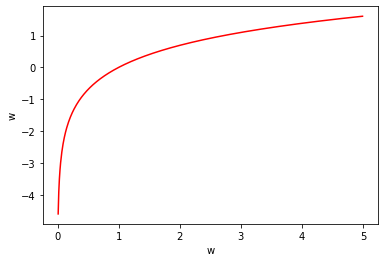

In [202]:
#plotting with matplotlib 
plt.plot(Wm,Um,color='r', label='u')


plt.xlabel("w")
plt.ylabel("w")
#plt.title("u,u',u'',a,a',r,r' on same graph")
#plt.legend()
plt.show()

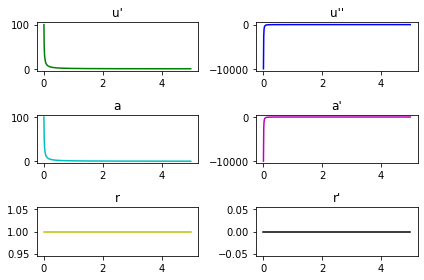

In [203]:
figure, axis = plt.subplots(3, 2)
axis[0, 0].plot(Wm,Um_,color='g')
axis[0, 0].set_title("u\'")
  

axis[0, 1].plot(Wm,Um__,color='b')
axis[0, 1].set_title("u\'\'")
  
# For Tangent Function
axis[1, 0].plot(Wm,Am,color='c')
axis[1, 0].set_title("a")

axis[1, 1].plot(Wm,Am_,color='m')
axis[1, 1].set_title("a\'")

axis[2, 0].plot(Wm,Rm,color='y')
axis[2, 0].set_title("r")

axis[2, 1].plot(Wm,Rm_,color='k')
axis[2, 1].set_title("r\'")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

# END 